In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing Data Set

In [5]:
data = pd.read_csv('Z:\\Sasindu\\Data set\\loan_data_set.csv')

In [6]:
df = pd.DataFrame(data)

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Informations of the Data set

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.shape

(614, 13)

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 ##### Discriptive Statistics

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Value Counts of categorical Data

In [12]:
features = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for feature in features:
    counts = df[feature].value_counts()
    print(f"Value counts of {feature} \n{counts}\n")

Value counts of Gender 
Male      489
Female    112
Name: Gender, dtype: int64

Value counts of Married 
Yes    398
No     213
Name: Married, dtype: int64

Value counts of Dependents 
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Value counts of Education 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Value counts of Self_Employed 
No     500
Yes     82
Name: Self_Employed, dtype: int64

Value counts of Property_Area 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Value counts of Loan_Status 
Y    422
N    192
Name: Loan_Status, dtype: int64



### Handling missing values

###### Dependents column type should be numerical.There was values 3+ and null, 3+ replace with 3 and fill null values from 0 ,because mode is 0 ,and converted df['Dependents'] to int type

In [13]:
mode = df['Dependents'].mode()[0]
df['Dependents']=df['Dependents'].replace('3+','3').fillna(mode)

In [14]:
df['Dependents']=df['Dependents'].astype('int32')

### Explotary Data Analisis for hanling missing values

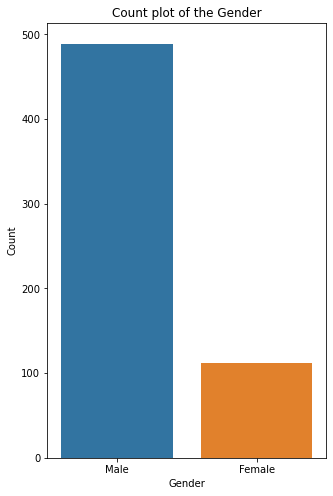

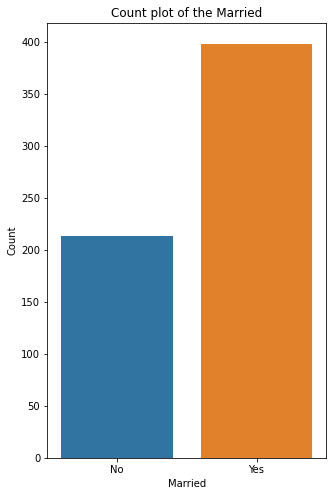

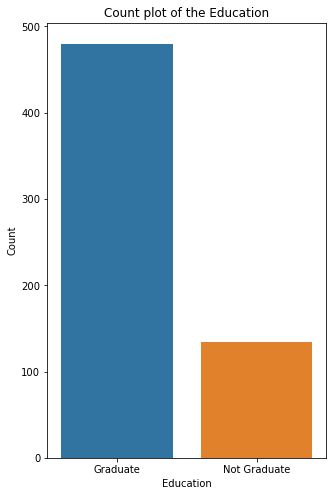

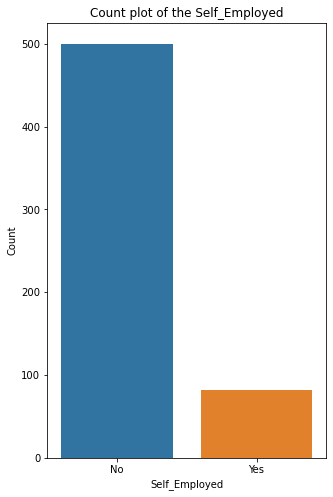

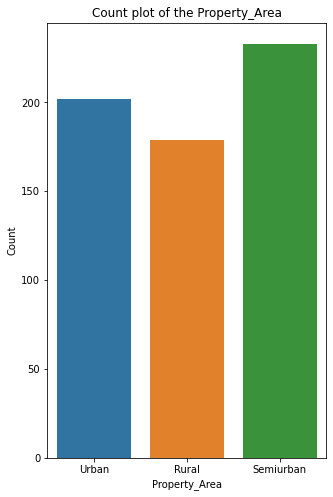

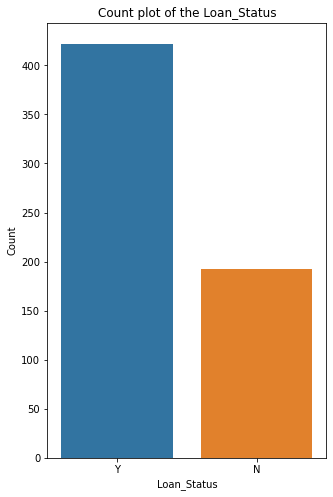

In [15]:
category_col = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

for column in category_col:
    plt.figure(figsize=(5,8))
    sns.countplot(df[column])
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.title(f'Count plot of the {column}')
    plt.show()

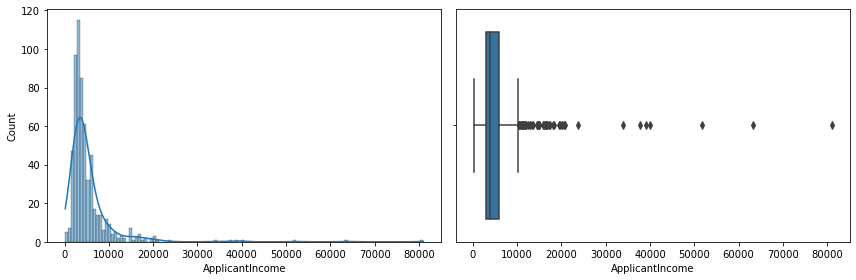

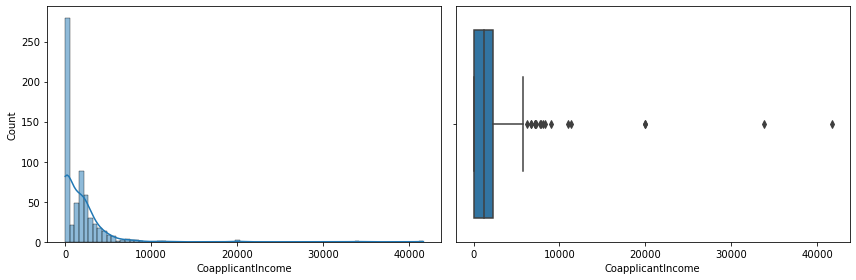

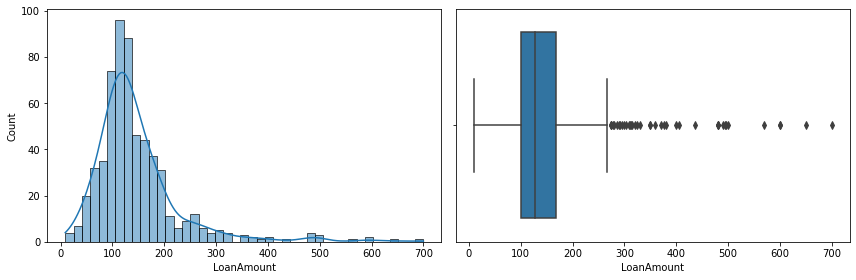

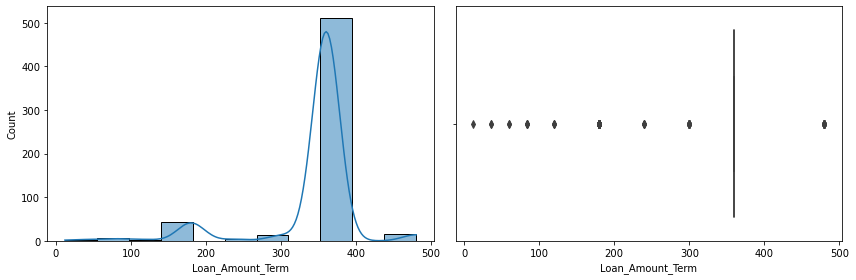

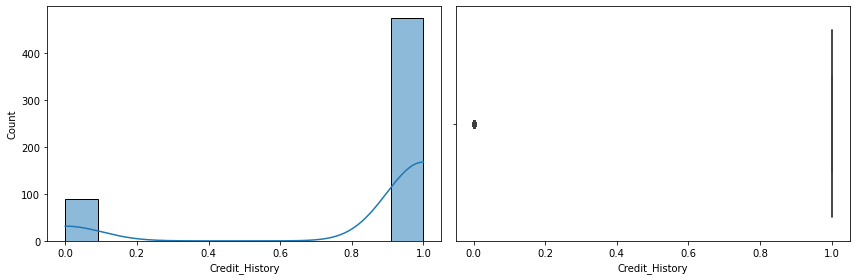

In [16]:
numeric_vals = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for col in numeric_vals:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

In [17]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Categorycal data filled with mode

In [18]:
category_col = ['Gender','Married','Education','Self_Employed','Property_Area']

for column in category_col:
    globals()[f'mode_{column}'] = df[column].mode()[0]
    df[column].fillna(globals()[f'mode_{column}'], inplace=True)
    print(f"Mode of {column} :",globals()[f'mode_{column}'])

Mode of Gender : Male
Mode of Married : Yes
Mode of Education : Graduate
Mode of Self_Employed : No
Mode of Property_Area : Semiurban


In [19]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [21]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

##### Loan_Amount_Term and Credit_History also like categorical data because thay haven't distributed distribution. So, Mode values of the each column can be added for missing values.

In [22]:
numeric_category_col = ['Credit_History','Loan_Amount_Term']

for column in numeric_category_col:
    globals()[f'mode_{column}'] = df[column].mode()[0]
    df[column].fillna(globals()[f'mode_{column}'], inplace=True)
    print(f"Mode of {column} :",globals()[f'mode_{column}'])

Mode of Credit_History : 1.0
Mode of Loan_Amount_Term : 360.0


In [23]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

##### LoanAmount has skewed distribution. Usualy,The Median is used to fill null values for this type senarios. So, Missing values of the Loan Amount was filled with median value.  

In [24]:
median_Loan_Amount = df['LoanAmount'].median()
df['LoanAmount'].fillna(median_Loan_Amount,inplace=True)

In [25]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##### Now, All the missing values have filled. Then, Move on to outlier ditection step.

### Remove Outliers.

In [26]:
ApplicantIncome_out = df['ApplicantIncome']<=50000
CoapplicantIncome_out =df['CoapplicantIncome']<=20000
LoanAmount_out =df['LoanAmount']<=500

In [27]:
df_no_outliers = df.copy()

df_no_outliers = df[(ApplicantIncome_out) & (CoapplicantIncome_out) & (LoanAmount_out)]

In [28]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            605 non-null    object 
 1   Gender             605 non-null    object 
 2   Married            605 non-null    object 
 3   Dependents         605 non-null    int32  
 4   Education          605 non-null    object 
 5   Self_Employed      605 non-null    object 
 6   ApplicantIncome    605 non-null    int64  
 7   CoapplicantIncome  605 non-null    float64
 8   LoanAmount         605 non-null    float64
 9   Loan_Amount_Term   605 non-null    float64
 10  Credit_History     605 non-null    float64
 11  Property_Area      605 non-null    object 
 12  Loan_Status        605 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 63.8+ KB


##### Actually, in this step, having domain knowledge is essential. By studying boxplot graphs, many outliers can be detected. However, these outliers might be actual values that could affect the model. Therefore, we remove the rows that have high variance.  

##### After removing outliers, there are 605 rows, Before there was 614 row. so, there is 9 rows has removed as outliers. 

In [29]:
df_no_outliers=df_no_outliers.drop(columns ='Loan_ID',axis=1)

In [30]:
df_no_outliers.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### Loan_ID colunm is not need further more. So, that column was removed.

### Feature Enginearing.

##### 'Gender','Married','Education','Self_Employed','Property_Area', and 'Loan_Status' are binary categorical columns and 'Property_Area' is N-ary categorycal variables. Here 'Loan_Status' is predicted variable. So that colunm can be encorded by using label encording method.
##### For other binary categorycal variable, One hot or Label encording can be applied becouse they are not ordinal variables. But as my thought, If I use one hot encording , the data frame end up with high number of dimentions. So,to enhance Encording with low diamentions, the suitable way is doing label encording.
##### To apply encording method for Property_Area variable, domain knowladge is needed. I think no critiria for selected for loan or not. I reffered following graphs to obtain this. one hot encording method can be applied.

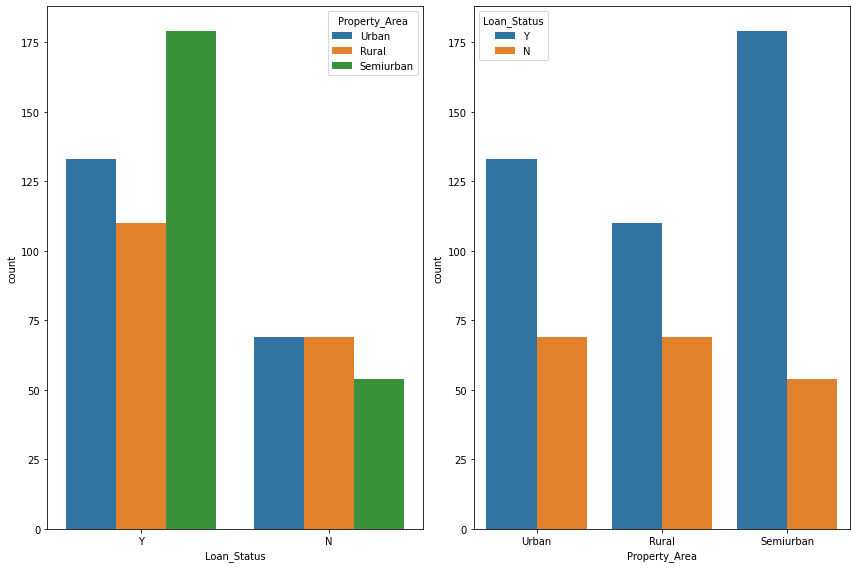

In [31]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
sns.countplot(data = df, hue= df["Property_Area"],x=df['Loan_Status'])
plt.subplot(1, 2, 2)
sns.countplot(data = df, x= df["Property_Area"],hue=df['Loan_Status'])
plt.tight_layout()
plt.show()

#### Lable encording to binary categorical features

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
LE = LabelEncoder()
cate_cols_LE = ['Gender','Married','Education','Self_Employed','Loan_Status']
df_encorded = df_no_outliers.copy()
for col in cate_cols_LE:
    df_encorded[col] = LE.fit_transform(df_encorded[col])

In [34]:
df_encorded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


#### One hot Encording for Property_Area 

In [35]:
df_encorded = pd.get_dummies(df_encorded, columns=['Property_Area'])

In [36]:
df_encorded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1


### Splitting Data

In [37]:
x = df_encorded.drop(columns ='Loan_Status',axis =1).values
y = df_encorded['Loan_Status'].values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

##### 20% of the whole data set was used as test set 

### Scaling Data

##### Typicaly, If the Data set is Normaly distributed , Satanderd scaler is used. If not,Minmax scaler is used.
##### In this senario, categorical columns not need scaling , but numerical columns has skewed distribution, normaly minmax scaling used to skewed distributions.

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
mm = MinMaxScaler()
x_train_scaled = mm.fit_transform(x_train)
x_test_scaled = mm.transform(x_test)

### PCA 

##### In this step, Enhancing performance and dimentionality reduction are expected. Selecting number of components in PCA is cruitiol. For that, scree plot can be used. In a scree plot is selected based on where the plot shows an elbow or inflection point

In [42]:
from sklearn.decomposition import PCA

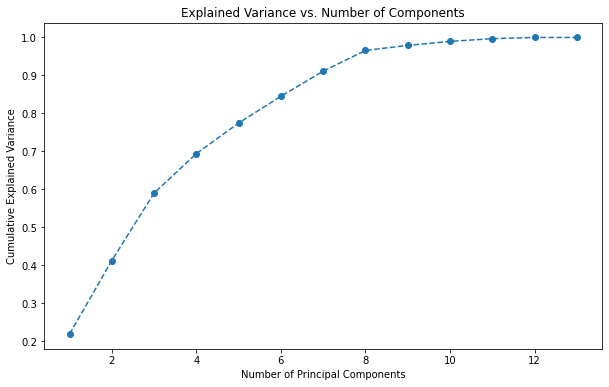

In [43]:
pca = PCA()
pca.fit(x_train_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

#### Apply PCA

In [44]:
pca = PCA(n_components=8)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

##### By studing above graph , 8 is the best number of components.

### Define Model

##### As a superviced learning classification problem, logistic regression was applied.

In [45]:
def model_acc(model):
    model.fit(x_train,y_train)
    acc = model.score(x_test, y_test)
    print(str(model)+'-->'+str(acc))

#### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression()
model_acc(lo)

LogisticRegression()-->0.8429752066115702


#### Decision Tree 

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model_acc(dt)

DecisionTreeClassifier()-->0.7024793388429752


#### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_acc(rf)

RandomForestClassifier()-->0.8181818181818182


### Train Model, Predict, and Calculating Model Accuracy

###### Here, PCA transformed data set was trained using Logistic regression, Decision tree, and Random forest. Then, Test set was used to predict y values and calculate accuracy for each models. from that best model can be choosen. Here we have to study accuracy , confution matrix   and classification report.

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())
]

for model_name, model in models:
    
    model.fit(x_train_pca,y_train)
    
    y_train_pred = model.predict(x_train_pca)
    y_test_pred = model.predict(x_test_pca)
    
    train_accuracy = accuracy_score(y_train,y_train_pred)
    test_accuracy = accuracy_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test,y_test_pred)
    class_report = classification_report(y_test, y_test_pred)
    
    print(model_name)
    print('Train_accuracy :',train_accuracy)
    print('Test_accuracy :\n',test_accuracy)
    print('Confusion_matrix :\n',conf_matrix)
    print('Classification_report :\n',class_report)


Logistic Regression
Train_accuracy : 0.8078512396694215
Test_accuracy :
 0.8347107438016529
Confusion_matrix :
 [[11 18]
 [ 2 90]]
Classification_report :
               precision    recall  f1-score   support

           0       0.85      0.38      0.52        29
           1       0.83      0.98      0.90        92

    accuracy                           0.83       121
   macro avg       0.84      0.68      0.71       121
weighted avg       0.84      0.83      0.81       121

Decision Tree
Train_accuracy : 1.0
Test_accuracy :
 0.71900826446281
Confusion_matrix :
 [[18 11]
 [23 69]]
Classification_report :
               precision    recall  f1-score   support

           0       0.44      0.62      0.51        29
           1       0.86      0.75      0.80        92

    accuracy                           0.72       121
   macro avg       0.65      0.69      0.66       121
weighted avg       0.76      0.72      0.73       121

Random Forest
Train_accuracy : 1.0
Test_accuracy :
 0.735

### Train Model, Predict, and Calculating Model Accuracy for scaled data (without PCA transformed)

In [50]:
for model_name, model in models:
    
    model.fit(x_train_scaled,y_train)
    
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    
    train_accuracy = accuracy_score(y_train,y_train_pred)
    test_accuracy = accuracy_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test,y_test_pred)
    class_report = classification_report(y_test, y_test_pred)
    
    print(model_name)
    print('Train_accuracy :',train_accuracy)
    print('Test_accuracy :\n',test_accuracy)
    print('Confusion_matrix :\n',conf_matrix)
    print('Classification_report :\n',class_report)

Logistic Regression
Train_accuracy : 0.8078512396694215
Test_accuracy :
 0.8347107438016529
Confusion_matrix :
 [[11 18]
 [ 2 90]]
Classification_report :
               precision    recall  f1-score   support

           0       0.85      0.38      0.52        29
           1       0.83      0.98      0.90        92

    accuracy                           0.83       121
   macro avg       0.84      0.68      0.71       121
weighted avg       0.84      0.83      0.81       121

Decision Tree
Train_accuracy : 1.0
Test_accuracy :
 0.6942148760330579
Confusion_matrix :
 [[16 13]
 [24 68]]
Classification_report :
               precision    recall  f1-score   support

           0       0.40      0.55      0.46        29
           1       0.84      0.74      0.79        92

    accuracy                           0.69       121
   macro avg       0.62      0.65      0.62       121
weighted avg       0.73      0.69      0.71       121

Random Forest
Train_accuracy : 1.0
Test_accuracy :
 0.8

#### Train Model, Predict, and Calculating Model Accuracy (Without scaled & PCA transformed)

In [51]:
for model_name, model in models:
    
    model.fit(x_train,y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    train_accuracy = accuracy_score(y_train,y_train_pred)
    test_accuracy = accuracy_score(y_test,y_test_pred)
    conf_matrix = confusion_matrix(y_test,y_test_pred)
    class_report = classification_report(y_test, y_test_pred)
    
    print(model_name)
    print('Train_accuracy :',train_accuracy)
    print('Test_accuracy :\n',test_accuracy)
    print('Confusion_matrix :\n',conf_matrix)
    print('Classification_report :\n',class_report)

Logistic Regression
Train_accuracy : 0.8037190082644629
Test_accuracy :
 0.8429752066115702
Confusion_matrix :
 [[12 17]
 [ 2 90]]
Classification_report :
               precision    recall  f1-score   support

           0       0.86      0.41      0.56        29
           1       0.84      0.98      0.90        92

    accuracy                           0.84       121
   macro avg       0.85      0.70      0.73       121
weighted avg       0.84      0.84      0.82       121

Decision Tree
Train_accuracy : 1.0
Test_accuracy :
 0.7024793388429752
Confusion_matrix :
 [[17 12]
 [24 68]]
Classification_report :
               precision    recall  f1-score   support

           0       0.41      0.59      0.49        29
           1       0.85      0.74      0.79        92

    accuracy                           0.70       121
   macro avg       0.63      0.66      0.64       121
weighted avg       0.75      0.70      0.72       121

Random Forest
Train_accuracy : 1.0
Test_accuracy :
 0.8

###### By studing accuracy factors, best model was given by logistic regression with scaled and PCA transformed data. It's accuracy is about 85.95% and precision is also high.